# Exercise 2: PCA (Add random seed to numpy)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.decomposition import PCA
import time
from constants import *
import PCA_utils

In [5]:
data_csv = pd.read_csv("data_proc.csv")
data = pd.DataFrame.to_numpy(data_csv)
data = np.delete(data, 0, 1)
np.random.shuffle(data)

# Exercise 2.1: Principal Component Analysis (PCA)

Perform a PCA on the data for the “all persons in” and “disjunct” data set.

1. Show the standard deviation ( From prcomp Eigenvalues ), the proportion of variance and the cumulative sum of variance of the principal components. (In the report the first 10-20 principal components, should be sufficient to illustrate the tendencies.)
2. Show the performance of selecting enough principal components to represent 80%, 90%, 95%, 99% of the accumulated variance. For each test vary “k” in kNN, try 3 reasonable values.
3. Measure run times for the prediction step of the kNN-classifier with PCA based dimensionality reduction. How does the feature vector dimensionality effect performance?
4. Interpret the results.

### <font color='orange'>2.1.1

In [6]:
d_train_all, l_train_all, d_test_all, l_test_all = PCA_utils.split_data_all(data, 0.8)
d_train_dis, l_train_dis, d_test_dis, l_test_dis = PCA_utils.split_data_disjunct(data, 0.8)

pca_all = PCA()
pca_all.fit(d_train_all)

pca_dis = PCA()
pca_dis.fit(d_train_dis)

PCA()

In [8]:
pca_all_varRatio = pca_all.explained_variance_ / np.sum(pca_all.explained_variance_)
pca_dis_varRatio = pca_dis.explained_variance_ / np.sum(pca_dis.explained_variance_)

pca_all_varRatioCum = np.ndarray(pca_all_varRatio.shape)
for i in range(len(pca_all_varRatio)):
    if i == 0:
        pca_all_varRatioCum[i] = pca_all_varRatio[i]
    else:
        pca_all_varRatioCum[i] = pca_all_varRatioCum[i-1] + pca_all_varRatio[i]

pca_dis_varRatioCum = np.ndarray(pca_dis_varRatio.shape)
for i in range(len(pca_dis_varRatio)):
    if i == 0:
        pca_dis_varRatioCum[i] = pca_dis_varRatio[i]
    else:
        pca_dis_varRatioCum[i] = pca_dis_varRatioCum[i-1] + pca_dis_varRatio[i]



In [19]:
sum = 0
print('PCA#\t std\t\t Pct\t\t CumVar\t\t CumPct')
for i in range(NUM_OF_PCA):
    sum += pca_all.explained_variance_[i]
    print(i, '\t', "{:.2f}".format(np.sqrt(pca_all.explained_variance_[i])), '\t', "{:.5f}".format(pca_all_varRatio[i]), '\t', "{:.2f}".format(sum), '\t', "{:.5}".format(pca_all_varRatioCum[i]))

PCA#	 std		 Pct		 CumVar		 CumPct
0 	 367.62 	 0.14402 	 135146.81 	 0.14402
1 	 224.12 	 0.05353 	 185378.36 	 0.19755
2 	 194.33 	 0.04024 	 223140.99 	 0.23779
3 	 175.74 	 0.03291 	 254026.52 	 0.2707
4 	 174.91 	 0.03260 	 284618.97 	 0.3033
5 	 162.49 	 0.02814 	 311022.94 	 0.33144
6 	 150.48 	 0.02413 	 333667.36 	 0.35557
7 	 147.14 	 0.02307 	 355316.41 	 0.37864
8 	 142.09 	 0.02151 	 375504.89 	 0.40015
9 	 140.16 	 0.02093 	 395150.08 	 0.42108
10 	 132.06 	 0.01859 	 412590.80 	 0.43967
11 	 125.89 	 0.01689 	 428437.99 	 0.45656
12 	 124.07 	 0.01640 	 443831.21 	 0.47296
13 	 119.89 	 0.01532 	 458204.06 	 0.48828
14 	 117.34 	 0.01467 	 471973.12 	 0.50295
15 	 113.31 	 0.01368 	 484811.37 	 0.51663
16 	 110.72 	 0.01306 	 497069.31 	 0.52969
17 	 109.58 	 0.01280 	 509077.28 	 0.54249
18 	 108.03 	 0.01244 	 520747.64 	 0.55493
19 	 104.44 	 0.01162 	 531654.46 	 0.56655


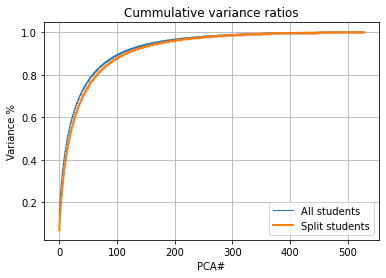

In [20]:
plt.plot(range(len(pca_all.explained_variance_)), pca_all_varRatioCum, linewidth=1.0, marker=".", markersize=1, label="All students")
plt.plot(range(len(pca_dis.explained_variance_)), pca_dis_varRatioCum, linewidth=2.0, marker=".", markersize=1, label="Split students")

plt.legend()
plt.title("Cummulative variance ratios")
plt.ylabel("Variance %")
plt.xlabel("PCA#")
plt.grid(True)
plt.show()

### <font color='orange'> 2.1.2

In [21]:
# Transform data into PCA space

d_train_all_pca = pca_all.transform(d_train_all)
d_test_all_pca = pca_all.transform(d_test_all)

d_train_dis_pca = pca_dis.transform(d_train_dis)
d_test_dis_pca = pca_dis.transform(d_test_dis)

In [11]:
# ks = [1, 2, 3, 5, 10]
# pcts = [0.8, 0.9, 0.95, 0.99]

# accuracy_all  = np.ndarray((len(pcts), len(ks)))
# comp_time_all = np.ndarray((len(pcts), len(ks)))
# print("K =", ks)

# print("Running for mixed students...")
# for i, pct in enumerate
# (pcts):
#     # argwhere returns array of indicies where the statement is true. min returns the smallest element i.e. the threshold index
#     pct_idx = np.min(np.argwhere(pca_all_varRatioCum > pct))

#     print("{:.0f}".format(pct*100), "%, p =", pct_idx)
#     a, _, _, _, t = PCA_utils.knnParamSearch(d_train_all_pca[:,:pct_idx], l_train_all, 
#                                             d_test_all_pca[:,:pct_idx], l_test_all, 
#                                             ks, metrics=['euclidean'])
#     accuracy_all[i,:] = np.array(a)
#     comp_time_all[i,:] = np.array(t)

# print('\n')

# accuracy_dis  = np.ndarray((len(pcts), len(ks)))
# comp_time_dis = np.ndarray((len(pcts), len(ks)))

# print("Running for split students...")
# for i, pct in enumerate(pcts):
#     pct_idx = np.min(np.argwhere(pca_dis_varRatioCum > pct))
    
#     print("{:.0f}".format(pct*100), "%, p =", pct_idx, "...")
#     a, _, _, _, t = PCA_utils.knnParamSearch(d_train_dis_pca[:,:pct_idx], l_train_dis, 
#                                             d_test_dis_pca[:,:pct_idx], l_test_dis, 
#                                             ks, metrics=['euclidean'])
#     accuracy_dis[i,:] = np.array(a)
#     comp_time_dis[i,:] = np.array(t)

# print('\n')

In [23]:
accuracy_all = pd.read_csv("acc_all.csv", header=None)
accuracy_all = pd.DataFrame.to_numpy(accuracy_all)
accuracy_dis = pd.read_csv("acc_dis.csv", header=None)
accuracy_dis = pd.DataFrame.to_numpy(accuracy_dis)
comp_time_all = pd.read_csv("c_time_all.csv", header=None)
comp_time_all = pd.DataFrame.to_numpy(comp_time_all)
comp_time_dis = pd.read_csv("c_time_dis.csv", header=None)
comp_time_dis = pd.DataFrame.to_numpy(comp_time_dis)

[0.86689394 0.85856061 0.85598485]



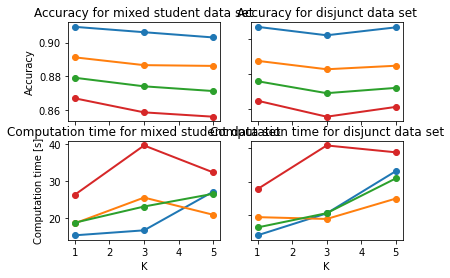

In [28]:
ks = [1, 3, 5]
pcts = [0.8, 0.9, 0.95, 0.99]

print(accuracy_all[3])
print()

fig, axs = plt.subplots(2, 2)

axs[0,0].plot(ks, accuracy_all[0], linewidth=2.0, marker=".", markersize=12,label="PCA 80% var")
axs[0,0].plot(ks, accuracy_all[1], linewidth=2.0, marker=".", markersize=12,label="PCA 90% var")
axs[0,0].plot(ks, accuracy_all[2], linewidth=2.0, marker=".", markersize=12,label="PCA 95% var")
axs[0,0].plot(ks, accuracy_all[3], linewidth=2.0, marker=".", markersize=12,label="PCA 99% var")
axs[0,0].set(title="Accuracy for mixed student data set", xlabel="K", ylabel="Accuracy")
# ax1.set_title("Accuracy for mixed student data set")
# ax1.set_xlabel("K")
# ax1.set_ylabel("Accuracy")
# ax1.legend()

axs[0,1].plot(ks, accuracy_dis[0], linewidth=2.0, marker=".", markersize=12,label="PCA 80% var")
axs[0,1].plot(ks, accuracy_dis[1], linewidth=2.0, marker=".", markersize=12,label="PCA 90% var")
axs[0,1].plot(ks, accuracy_dis[2], linewidth=2.0, marker=".", markersize=12,label="PCA 95% var")
axs[0,1].plot(ks, accuracy_dis[3], linewidth=2.0, marker=".", markersize=12,label="PCA 99% var")
axs[0,1].set(title="Accuracy for disjunct data set", xlabel="K", ylabel="Accuracy")
# ax2.set_title("Accuracy for disjunct data set")
# ax2.set_xlabel("K")
# ax2.set_ylabel("Accuracy")
# ax2.legend()

axs[1,0].plot(ks, comp_time_all[0], linewidth=2.0, marker=".", markersize=12,label="PCA 80% var")
axs[1,0].plot(ks, comp_time_all[1], linewidth=2.0, marker=".", markersize=12,label="PCA 90% var")
axs[1,0].plot(ks, comp_time_all[2], linewidth=2.0, marker=".", markersize=12,label="PCA 95% var")
axs[1,0].plot(ks, comp_time_all[3], linewidth=2.0, marker=".", markersize=12,label="PCA 99% var")
axs[1,0].set(title="Computation time for mixed student data set", xlabel="K", ylabel="Computation time [s]")
# ax3.set_title("Computation time for mixed student data set")
# ax3.set_xlabel("K")
# ax3.set_ylabel("Computation time [s]")
# ax3.legend()

axs[1,1].plot(ks, comp_time_dis[0], linewidth=2.0, marker=".", markersize=12,label="PCA 80% var")
axs[1,1].plot(ks, comp_time_dis[1], linewidth=2.0, marker=".", markersize=12,label="PCA 90% var")
axs[1,1].plot(ks, comp_time_dis[2], linewidth=2.0, marker=".", markersize=12,label="PCA 95% var")
axs[1,1].plot(ks, comp_time_dis[3], linewidth=2.0, marker=".", markersize=12,label="PCA 99% var")
axs[1,1].set(title="Computation time for disjunct data set", xlabel="K", ylabel="Computation time [s]")
# ax4.set_title("Computation time for disjunct data set")
# ax4.set_xlabel("K")
# ax4.set_ylabel("Computation time [s]")
# ax4.legend()

for ax in axs.flat:
    ax.label_outer()






# Exercise 2.2: Normalization

1. Perform one of the two normalizations suggested in the lecture (min-max normalization and z-standardization) for the best parameter setting found under 2.1.3 and apply kNN with 10 fold cross-validation (10 runs, 90% training and 10% test set).
2. Apply the normalization before and after PCA independently and compare the results. Analyze the results.

# Exercise 2.3: Preprocessing

Apply Gaussian smoothing function with different sigmas to the images. Perform again the steps in task 2.2 (Cross validation). Describe and analyze the results for one of the smoothing methods depending on the amount of smoothing.

# Exercise 2.4: Reconstruction using PCA

1. This task is about reconstructing data using PCA. First select some images from the dataset and plot them.
2. Plot the first 10 eigenvectors/loadingvectors as images. Can you describe what you see?
3. Plot a reconstruction of the images you displayed in 2.4.1 using all PC’s. This can be done by multiplying the loadings with the scores and adding the removed centering.
4. Now re-recreate using 80% of variance, 90% and 95%. Can you describe what you see? How much have you reduced the data size?
5. The last exercise is to compare the outcomes between two different ciphers. For instance, two different ciphers, (e.g. datapoints that represent a ’0’ and a ’1’), compare the 10 first scores and see if you can spot a difference. Try also to calculate the mean for all instances of these ciphers and compare the first 10 scores. Can you spot a pattern when comparing with the loadings.